In [61]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

music = pd.DataFrame()
music['duration'] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 
                     205, 110, 307, 110, 397, 153, 190, 192, 210, 403,
                     164, 198, 204, 253, 234, 190, 182, 401, 376, 102]
music['loudness'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 
                     20, 10, 17, 51, 7, 13, 19, 12, 21, 22,
                     16, 18, 4, 23, 34, 19, 14, 11, 37, 42]
music['bpm'] = [ 105, 90, 78, 75, 120, 110, 80, 100, 105, 60,
                  70, 105, 95, 70, 90, 105, 70, 75, 102, 100,
                  100, 95, 90, 80, 90, 80, 100, 105, 70, 65]

- One way to help you find the best value of K is to plot the graph of K value and the corresponding error rate for the dataset.

In [62]:
error = []

# Calculating error for K values between 1 and 24
for i in range(1, 24):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

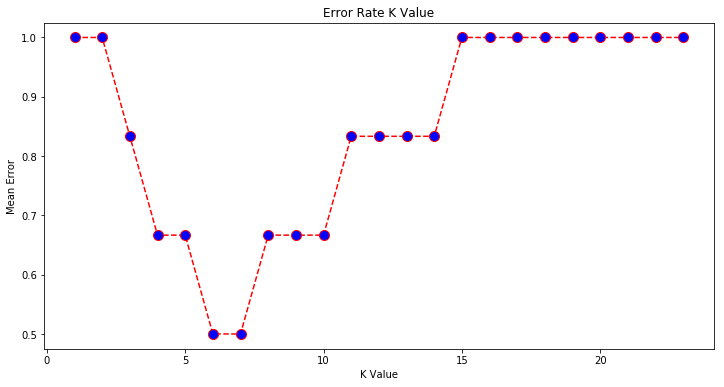

In [63]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 24), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error') 

- From the output we can see that the mean error is lowest when the value of the K is between 6 and 7.

### Adding in the Duration feature

In [64]:
X = music[['loudness', 'duration']]
Y = music.bpm

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

train = X_train.join(y_train)
test = X_test.join(y_test)

In [65]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  

In [66]:
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=7)  
classifier.fit(X_train, y_train)  

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='uniform')

In [67]:
classifier_w = KNeighborsClassifier(n_neighbors=7,weights='distance')  
classifier_w.fit(X_train, y_train)  

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='distance')

In [68]:
y_pred = classifier.predict(X_test) 
y_pred_w = classifier_w.predict(X_test) 

In [69]:
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

          70       0.33      1.00      0.50         1
          80       1.00      1.00      1.00         1
         100       0.00      0.00      0.00         2
         105       0.50      1.00      0.67         1
         120       0.00      0.00      0.00         1

   micro avg       0.50      0.50      0.50         6
   macro avg       0.37      0.60      0.43         6
weighted avg       0.31      0.50      0.36         6



In [70]:
print(classification_report(y_test, y_pred_w)) 

              precision    recall  f1-score   support

          60       0.00      0.00      0.00         0
          70       0.00      0.00      0.00         1
          75       0.00      0.00      0.00         0
          80       0.00      0.00      0.00         1
         100       0.00      0.00      0.00         2
         105       0.33      1.00      0.50         1
         120       0.00      0.00      0.00         1

   micro avg       0.17      0.17      0.17         6
   macro avg       0.05      0.14      0.07         6
weighted avg       0.06      0.17      0.08         6



In [71]:
score_scaler = cross_val_score(classifier,X_train, y_train, cv=4)
print("Scaler Accuracy: %0.2f (+/- %0.2f)" % (score_scaler.mean(), score.std() * 2))
score_scaler_w = cross_val_score(classifier_w,X_train, y_train, cv=4)
print("Scaler and Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_scaler_w.mean(), score.std() * 2))

Scaler Accuracy: 0.12 (+/- 0.41)
Scaler and Weighted Accuracy: 0.22 (+/- 0.41)


- Scaling and weighting the each data feature had a marginal improvement on accuracy. 